# **ML Model for Classification of Flowers (Dandelion, Daisy, Rose, Sunflower, Tulip)** 


# **~ By Divyansh Mishra and Kumkum Sharma**
(Scholars at GLA University, Mathura)


In [ ]:
# Importing needed packages
import numpy as np
import os
import cv2
from glob import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import f1_score

In [ ]:
paths_to_Daisy_images = glob(os.path.join(os.getcwd(),'/content/sample_data/Daisy//*.jpg'))
paths_to_Dandelion_images = glob(os.path.join(os.getcwd(),'/content/sample_data/Dandelion//*.jpg'))
paths_to_Rose_images = glob(os.path.join(os.getcwd(),'/content/sample_data/Rose//*.jpg'))
paths_to_Sunflower_images = glob(os.path.join(os.getcwd(),'/content/sample_data/Sunflower//*.jpg'))
paths_to_Tulip_images = glob(os.path.join(os.getcwd(),'/content/sample_data/Tulip//*.jpg'))


In [ ]:
print("no. of Daisy Images = ",len(paths_to_Daisy_images))
print("no. of Dandelion Images = ",len(paths_to_Dandelion_images))
print("no. of Rose Images = ",len(paths_to_Rose_images))
print("no. of Sunflower Images = ",len(paths_to_Sunflower_images))
print("no. of Tulip Images = ",len(paths_to_Tulip_images))


no. of Daisy Images =  764
no. of Dandelion Images =  1047
no. of Rose Images =  784
no. of Sunflower Images =  633
no. of Tulip Images =  229


original size: (240, 159, 3) resized to: (256, 256, 3)


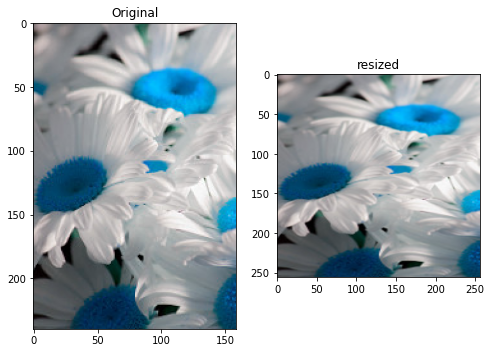

In [ ]:
# Example of a flower image and resizing it to (256 by 256) PIXELS

image_no = 300  # out of 694 Images

original_image_array = cv2.imread(paths_to_Daisy_images[image_no])
resized_image_array = cv2.resize(original_image_array, (256,256), interpolation=cv2.INTER_LINEAR)


f = plt.figure(figsize=(8, 8))
f.add_subplot(1, 2, 1)
plt.imshow(original_image_array) , plt.title("Original")
f.add_subplot(1,2, 2)
plt.imshow(resized_image_array) , plt.title("resized")    

print("original size:",original_image_array.shape, "resized to:",resized_image_array.shape)

In [ ]:
x_training_set_of_orig_resized_img_arr = []


# adding Daisy(y = 0) image to training set 
#--------------------------------------------------------------------------------------------------
for path in paths_to_Daisy_images:
    
    img_arr = cv2.imread(path)
    
    res = cv2.resize(img_arr, (256,256), interpolation=cv2.INTER_LINEAR)
    
    x_training_set_of_orig_resized_img_arr.append(res)
    
 
    
    
    
    
    
# adding Dandelion(y = 1) image to training set 
#--------------------------------------------------------------------------------------------------
for path in paths_to_Dandelion_images:
    
    img_arr = cv2.imread(path)
    
    res = cv2.resize(img_arr, (256,256), interpolation=cv2.INTER_LINEAR)
    
    x_training_set_of_orig_resized_img_arr.append(res)





# adding Rose(y = 2) image to training set 
#--------------------------------------------------------------------------------------------------
for path in paths_to_Rose_images:
    
    img_arr = cv2.imread(path)
    
    res = cv2.resize(img_arr, (256,256), interpolation=cv2.INTER_LINEAR)
    
    x_training_set_of_orig_resized_img_arr.append(res)






# adding Sunflower(y = 3) image to training set 
#--------------------------------------------------------------------------------------------------
for path in paths_to_Sunflower_images:
    
    img_arr = cv2.imread(path)
    
    res = cv2.resize(img_arr, (256,256), interpolation=cv2.INTER_LINEAR)
    
    x_training_set_of_orig_resized_img_arr.append(res)







# adding Tulip(y = 4) image to training set 
#--------------------------------------------------------------------------------------------------
for path in paths_to_Tulip_images:
    
    img_arr = cv2.imread(path)
    
    res = cv2.resize(img_arr, (256,256), interpolation=cv2.INTER_LINEAR)
    
    x_training_set_of_orig_resized_img_arr.append(res)


    
x_training_set_of_orig_resized_img_arr = np.array(x_training_set_of_orig_resized_img_arr)

In [ ]:
# defining y training set

y_training_set = np.hstack((np.zeros((1, len(paths_to_Daisy_images)), dtype = 'int32'), 
                          np.ones((1, len(paths_to_Dandelion_images)), dtype = 'int32'), 
                          np.full((1,len(paths_to_Rose_images)), 2, dtype = 'int32'), 
                          np.full((1,len(paths_to_Sunflower_images)), 3, dtype = 'int32'), 
                          np.full((1,len(paths_to_Tulip_images)), 4, dtype = 'int32')))

In [ ]:
x_training_set_of_orig_resized_img_arr.shape

(3457, 256, 256, 3)

In [ ]:
y_training_set.shape

(1, 3457)

In [ ]:
# Flattening the data for computation ease

total_no_of_pixels_values_in_a_processed_image = 256*256*3

train_set_flattented = x_training_set_of_orig_resized_img_arr.reshape( total_no_of_pixels_values_in_a_processed_image , -1).T

In [ ]:
# Diminesions of data

print("size of x_training_set_of_orig_resized_img_arr :",x_training_set_of_orig_resized_img_arr.shape)
print("size of train_set_flattented :",train_set_flattented.shape)
print("size of y_training_set :",y_training_set.shape)

size of x_training_set_of_orig_resized_img_arr : (3457, 256, 256, 3)
size of train_set_flattented : (3457, 196608)
size of y_training_set : (1, 3457)


Dandelion


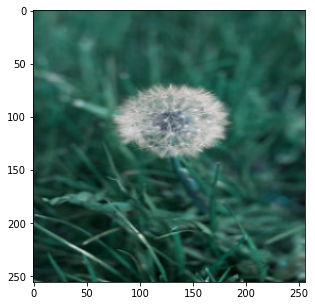

In [ ]:
# Showing an example from training data - set

image_example = 1000   # out of 3036

f = plt.figure(figsize=(5, 5))
plt.imshow(x_training_set_of_orig_resized_img_arr[image_example])

if(y_training_set[0][image_example] == 0):
    print("Daisy")
elif(y_training_set[0][image_example] == 1):
    print("Dandelion")
elif(y_training_set[0][image_example] == 2):
    print("Rose")
elif(y_training_set[0][image_example] == 3):
    print("Sunflower")
elif(y_training_set[0][image_example] == 4):
    print("Tulip")

In [ ]:
#  Splitting the data

X_train, X_test, y_train, y_test = train_test_split(train_set_flattented, y_training_set.T, test_size = 0.33, random_state = 42)

In [ ]:
# Building the Model By SVM

model=SVC()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)


# accuracy Analysis
print("By SVM")
print("Model Score :",model.score(X_test, y_test))
print()
print("Accuracy :",metrics.accuracy_score(y_test, y_predict))
print()
print("Confusion Mtrix :")
print(metrics.confusion_matrix(y_test, y_predict))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


By SVM
Model Score : 0.9553023663453112

Accuracy : 0.9553023663453112

Confusion Mtrix :
[[267   0   0   0   0]
 [  0 360   1   0   0]
 [  0   5 220   0   3]
 [  0   0  22 187   1]
 [  0   0  14   5  56]]


In [ ]:
print("F1-score = ", f1_score(y_test, y_predict, average='micro'))

F1-score =  0.9553023663453112


In [ ]:
#pickle model

import pickle
pickle.dump(model,open('flower_image_pred.pkl','wb'))